In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from scipy.sparse import csr_matrix
from IPython.display import display
from sklearn.cluster import KMeans 
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# Import the Movies dataset
movies = pd.read_csv('movies.csv')
movies.head()

,movieid,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
# Import the ratings dataset
ratings = pd.read_csv('ratings.csv')
ratings.head()

,userid,movieid,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [4]:
# Import the users dataset
users = pd.read_csv('users.csv')
users.head()

,userid,gender,age,occupation,zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [5]:
#Separate men from women
female = users[users['gender'] == "F"]
print(female.head())
male = users[users['gender'] == "M"]
print(male.head())

    userid gender  age  occupation zip-code
0        1      F    1          10    48067
5        6      F   50           9    55117
9       10      F   35           1    95370
10      11      F   25           1    04093
15      16      F   35           0    20670
   userid gender  age  occupation zip-code
1       2      M   56          16    70072
2       3      M   25          15    55117
3       4      M   45           7    02460
4       5      M   25          20    55455
6       7      M   35           1    06810


In [6]:
#All men rate scores and all women rate scores
f = female['userid']
m = male['userid']
a = []
b = []
for i in f:
    a.append(i)
aa = a[1:]
rat_female = ratings.loc[ratings['userid'] == 1]
for j in aa:
    rat_female = rat_female.append(ratings.loc[ratings['userid'] == j])
print("female's rate scores:")
print(rat_female)
for x in m:
    b.append(x)
bb = b[1:]
rat_male = ratings.loc[ratings['userid'] == 2]
for y in bb:
    rat_male = rat_male.append(ratings.loc[ratings['userid'] == y])
print("male's rate scores:")
print(rat_male)

female's rate scores:
       userid  movieid  rating   timestamp
0           1       31     2.5  1260759144
1           1     1029     3.0  1260759179
2           1     1061     3.0  1260759182
3           1     1129     2.0  1260759185
4           1     1172     4.0  1260759205
...       ...      ...     ...         ...
99816     668     3000     3.0   993613196
99817     668     3039     3.0   993613196
99818     668     3213     3.0   993613359
99819     668     4012     3.0   993613196
99820     668     6425     1.0   993613478

[27508 rows x 4 columns]
male's rate scores:
        userid  movieid  rating   timestamp
20           2       10     4.0   835355493
21           2       17     5.0   835355681
22           2       39     5.0   835355604
23           2       47     4.0   835355552
24           2       50     4.0   835355586
...        ...      ...     ...         ...
99999      671     6268     2.5  1065579370
100000     671     6269     4.0  1065149201
100001     671     6

In [7]:
ratings_title = pd.merge(ratings, movies[['movieid', 'title']], on='movieid' )
user_movie_ratings = pd.pivot_table(ratings_title, index='userid', columns= 'title', values='rating')

print('dataset dimensions: ', user_movie_ratings.shape, '\n\nSubset example:')
user_movie_ratings.iloc[:6, :10]

dataset dimensions:  (671, 9064) 

Subset example:


title,"""Great Performances"" Cats (1998)",$9.99 (2008),'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009)
userid,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN


In [8]:
user_movie_ratings_f = user_movie_ratings.loc[a, :]
user_movie_ratings_f

c:\users\dell\pycharmprojects\pythonproject\venv\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


title,"""Great Performances"" Cats (1998)",$9.99 (2008),'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),...,Zulu (1964),Zulu (2013),[REC] (2007),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931),İtirazım Var (2014)
userid,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6035,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6036,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
user_movie_ratings_m = user_movie_ratings.loc[b, :]
user_movie_ratings_m

title,"""Great Performances"" Cats (1998)",$9.99 (2008),'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),...,Zulu (1964),Zulu (2013),[REC] (2007),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931),İtirazım Var (2014)
userid,,,,,,,,,,,,,,,,,,,,,
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#It can be seen from the table above that many users have not seen many movies, and there are fewer female users and movies they have seen. Therefore, the top 800 films that female users have seen the most are selected for clustering

def get_most_rated_movies(user_movie_ratings, max_number_of_movies):
    # 1- Count
    user_movie_ratings = user_movie_ratings.append(user_movie_ratings.count(), ignore_index=True)
    # 2- sort
    user_movie_ratings_sorted = user_movie_ratings.sort_values(len(user_movie_ratings) - 1, axis=1, ascending=False)
    user_movie_ratings_sorted = user_movie_ratings_sorted.drop(user_movie_ratings_sorted.tail(1).index)
    # 3- slice
    most_rated_movies = user_movie_ratings_sorted.iloc[:, :max_number_of_movies]
    return most_rated_movies

user_movie_ratings_f =  pd.pivot_table(ratings_title, index='userid', columns= 'title', values='rating')
most_rated_movies_800_f = get_most_rated_movies(user_movie_ratings, 800)
most_rated_movies_800_f

title,Forrest Gump (1994),Pulp Fiction (1994),"Shawshank Redemption, The (1994)","Silence of the Lambs, The (1991)",Star Wars: Episode IV - A New Hope (1977),Jurassic Park (1993),"Matrix, The (1999)",Toy Story (1995),Schindler's List (1993),Terminator 2: Judgment Day (1991),...,Bob Roberts (1992),Falling Down (1993),"Simple Plan, A (1998)","Color Purple, The (1985)",Free Willy (1993),Bulworth (1998),"Secret Garden, The (1993)",Die Another Day (2002),Taken (2008),"Grapes of Wrath, The (1940)"
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.0,4.0,NaN,3.0,NaN,4.0,NaN,NaN,4.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5.0,4.5,5.0,3.0,NaN,NaN,NaN,NaN,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5.0,5.0,NaN,NaN,5.0,5.0,NaN,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666,4.0,5.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
667,NaN,5.0,4.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
668,NaN,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
669,NaN,NaN,5.0,5.0,NaN,NaN,4.0,4.0,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
#In order to cluster the data with blank values, it is transformed into sparse CSR matrix
sparse_ratings_f = csr_matrix(pd.SparseDataFrame(most_rated_movies_800_f).to_coo())
sparse_ratings_f

<ipython-input-14-51ef48d8b673>:2: FutureWarning: SparseDataFrame is deprecated and will be removed in a future version.
Use a regular DataFrame whose columns are SparseArrays instead.

See http://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#migrating for more.

  sparse_ratings_f = csr_matrix(pd.SparseDataFrame(most_rated_movies_800_f).to_coo())


<671x800 sparse matrix of type '<class 'numpy.float64'>'
	with 56784 stored elements in Compressed Sparse Row format>

In [15]:
#Because many users have not seen many movies, the score is blank, so it is difficult to judge the K value of clustering, so it is convenient to select k value by filling with 0
from scipy.spatial.distance import cdist
most_rated_movies_800_f_0 =  most_rated_movies_800_f.fillna(0)

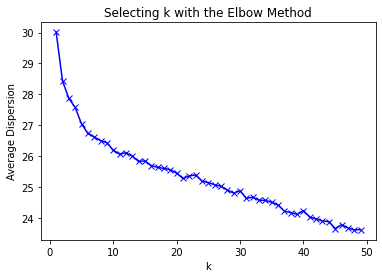

In [16]:
#female  k  
zscore_data_f = (most_rated_movies_800_f_0-most_rated_movies_800_f_0.mean())/most_rated_movies_800_f_0.std()
K = range(1, 50)
meandistortions_f = []
for k in K:
    kmeans_s_f = KMeans(n_clusters=k)
    kmeans_s_f.fit(most_rated_movies_800_f_0)
    meandistortions_f.append(sum(np.min(cdist(most_rated_movies_800_f_0, kmeans_s_f.cluster_centers_, 'euclidean'), axis=1))/most_rated_movies_800_f_0.shape[0])
    #cdist: Compute the distance 'Euclidean' of all vector pairs between two matrix rows
plt.plot(K, meandistortions_f, 'bx-')
plt.xlabel('k')
plt.ylabel('Average Dispersion')
plt.title('Selecting k with the Elbow Method')
plt.show()

cluster # 3
# of users in cluster: 302. # of users in plot: 50


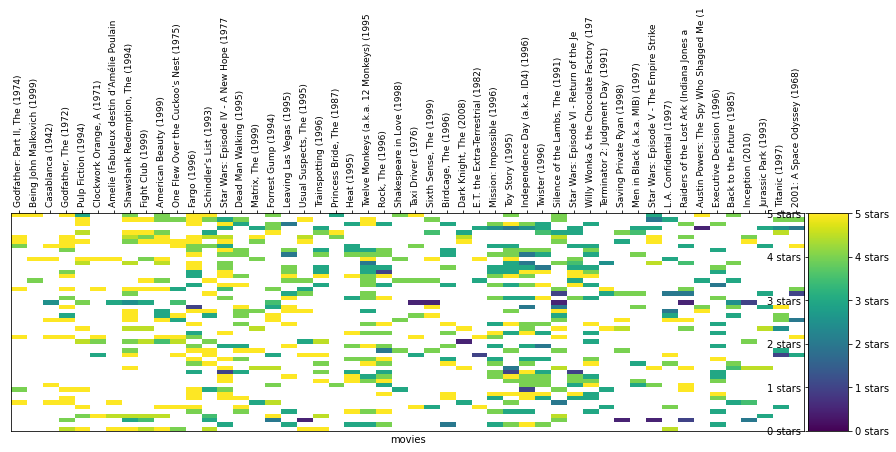

cluster # 6
# of users in cluster: 85. # of users in plot: 50


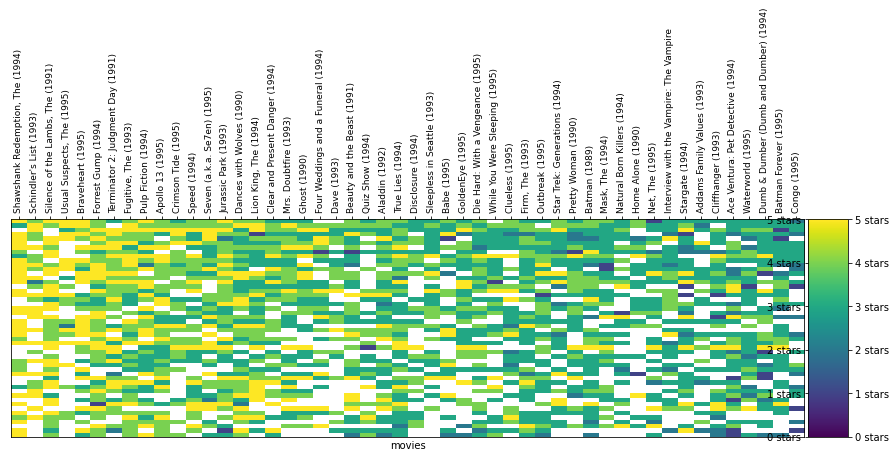

cluster # 0
# of users in cluster: 23. # of users in plot: 23


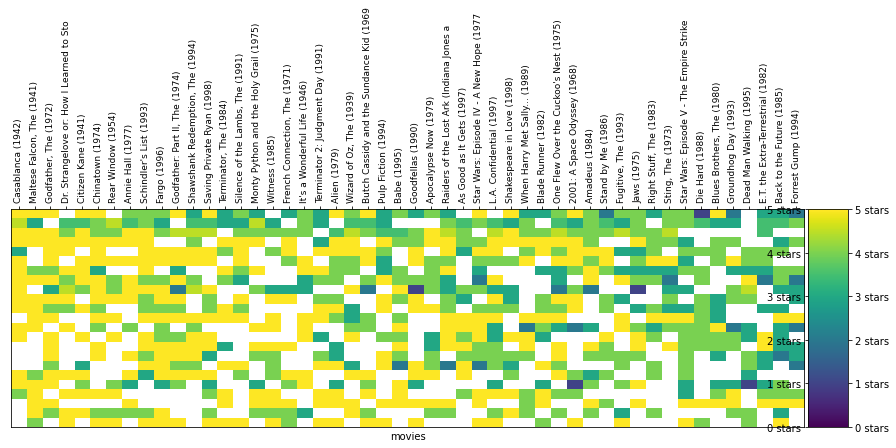

cluster # 4
# of users in cluster: 73. # of users in plot: 50


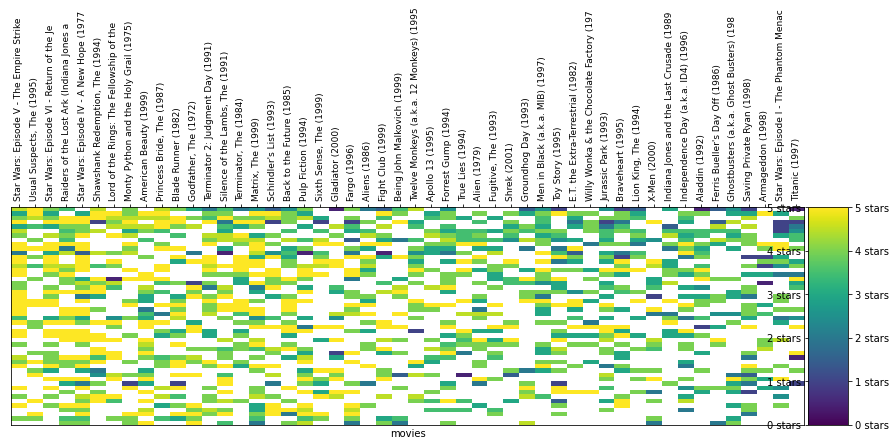

cluster # 9
# of users in cluster: 75. # of users in plot: 50


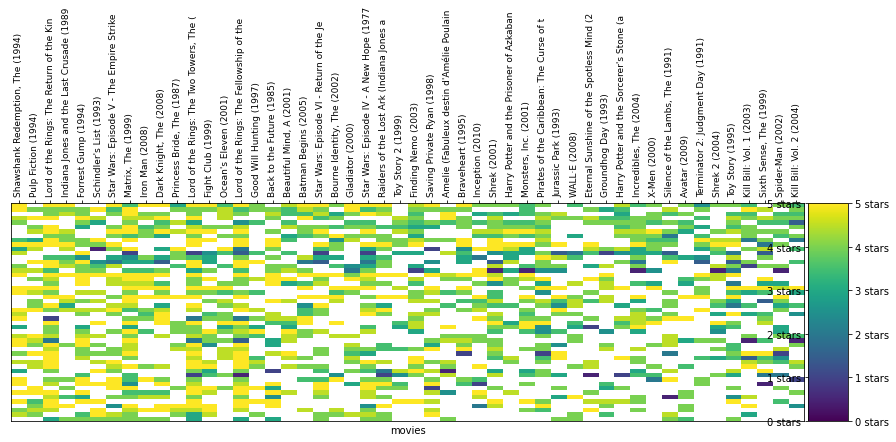

cluster # 7
# of users in cluster: 15. # of users in plot: 15


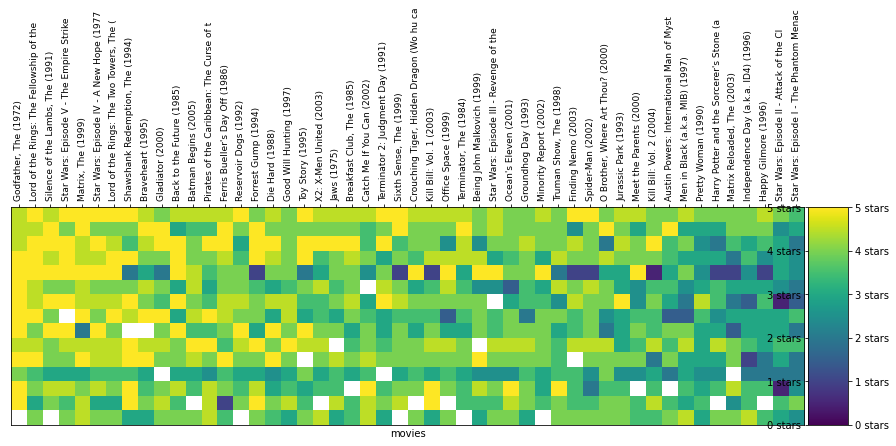

cluster # 1
# of users in cluster: 36. # of users in plot: 36


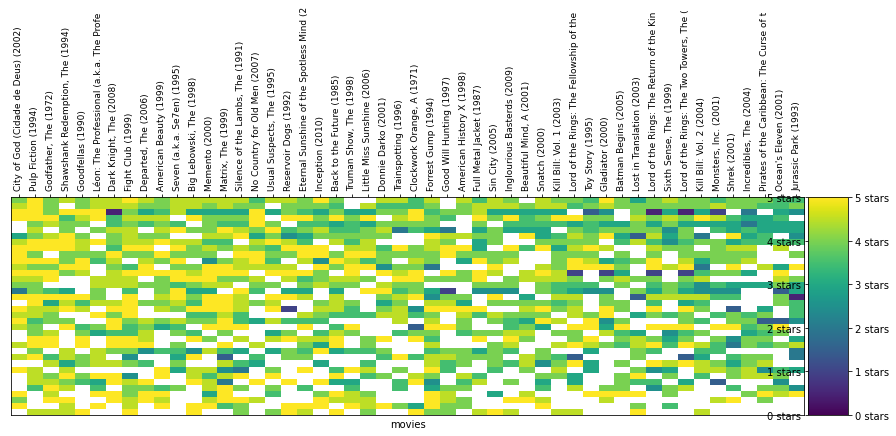

cluster # 8
# of users in cluster: 10. # of users in plot: 10


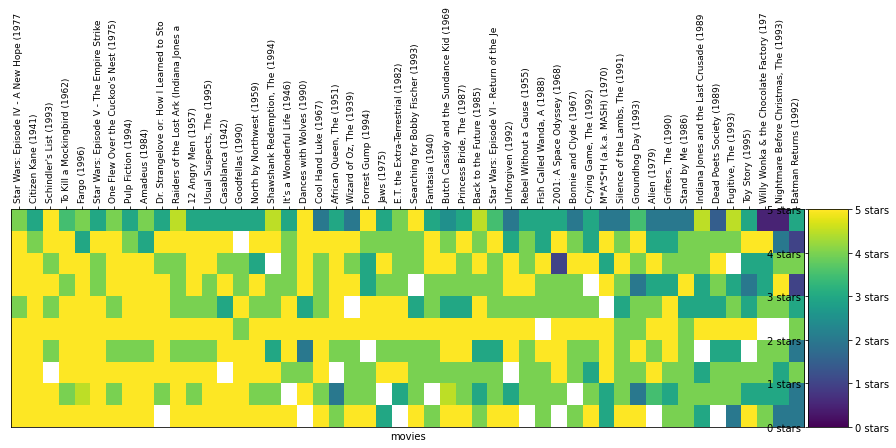

cluster # 2
# of users in cluster: 45. # of users in plot: 45


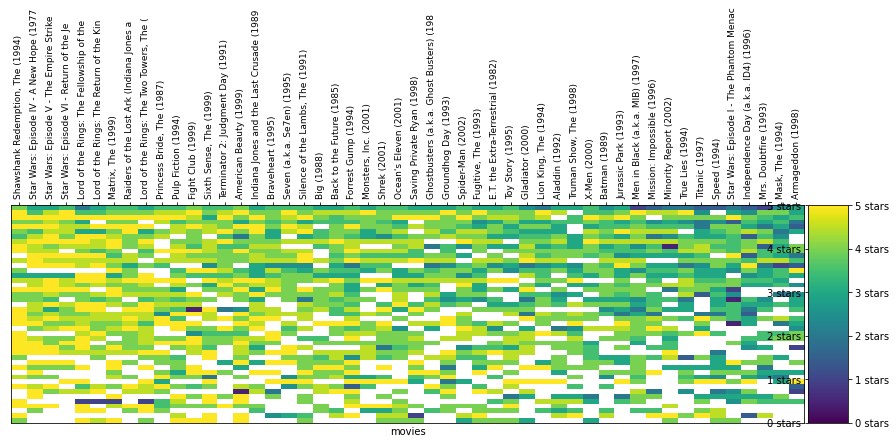

In [28]:
#Based on the diagram and the actual situation, 10 is more appropriate
kmeans_f = KMeans(n_clusters=10, algorithm='full').fit_predict(sparse_ratings_f)
max_users = 50
max_movies = 50

def get_users_who_rate_the_most(most_rated_movies, max_number_of_movies):
    # Get most voting users
    # 1- Count
    most_rated_movies['counts'] = pd.Series(most_rated_movies.count(axis=1))
    # 2- Sort
    most_rated_movies_users = most_rated_movies.sort_values('counts', ascending=False)
    # 3- Slice
    most_rated_movies_users_selection = most_rated_movies_users.iloc[:max_number_of_movies, :]
    most_rated_movies_users_selection = most_rated_movies_users_selection.drop(['counts'], axis=1)
    
    return most_rated_movies_users_selection

def sort_by_rating_density(user_movie_ratings, n_movies, n_users):
    most_rated_movies = get_most_rated_movies(user_movie_ratings, n_movies)
    most_rated_movies = get_users_who_rate_the_most(most_rated_movies, n_users)
    return most_rated_movies

def draw_movie_clusters(clustered, max_users, max_movies):
    c = 1
    for cluster_id in clustered.group.unique():
        # To improve visibility, we're showing at most max_users users and max_movies movies per cluster.
        # You can change these values to see more users & movies per cluster
        d = clustered[clustered.group == cluster_id].drop(['index', 'group'], axis=1)
        n_users_in_cluster = d.shape[0]

        d = sort_by_rating_density(d, max_movies, max_users)

        d = d.reindex(d.mean().sort_values(ascending=False).index, axis=1)
        d = d.reindex(d.count(axis=1).sort_values(ascending=False).index)
        d = d.iloc[:max_users, :max_movies]
        n_users_in_plot = d.shape[0]

        # We're only selecting to show clusters that have more than 9 users, otherwise, they're less interesting
        if len(d) > 9:
            print('cluster # {}'.format(cluster_id))
            print('# of users in cluster: {}.'.format(n_users_in_cluster),
                  '# of users in plot: {}'.format(n_users_in_plot))
            fig = plt.figure(figsize=(15, 4))
            ax = plt.gca()

            ax.invert_yaxis()
            ax.xaxis.tick_top()
            labels = d.columns.str[:40]

            ax.set_yticks(np.arange(d.shape[0]), minor=False)
            ax.set_xticks(np.arange(d.shape[1]), minor=False)

            ax.set_xticklabels(labels, minor=False)

            ax.get_yaxis().set_visible(False)

            # Heatmap
            heatmap = plt.imshow(d, vmin=0, vmax=5, aspect='auto')

            ax.set_xlabel('movies')
            ax.set_ylabel('User id')

            divider = make_axes_locatable(ax)
            cax = divider.append_axes("right", size="5%", pad=0.05)

            # Color bar
            cbar = fig.colorbar(heatmap, ticks=[5, 4, 3, 2, 1, 0], cax=cax)
            cbar.ax.set_yticklabels(['5 stars', '4 stars', '3 stars', '2 stars', '1 stars', '0 stars'])

            plt.setp(ax.get_xticklabels(), rotation=90, fontsize=9)
            plt.tick_params(axis='both', which='both', bottom='off', top='off', left='off', labelbottom='off',
                            labelleft='off')
            # print('cluster # {} \n(Showing at most {} users and {} movies)'.format(cluster_id, max_users, max_movies))

            plt.show()

clustered_f = pd.concat([most_rated_movies_800_f.reset_index(), pd.DataFrame({'group':kmeans_f})], axis=1)
draw_movie_clusters(clustered_f, max_users, max_movies)

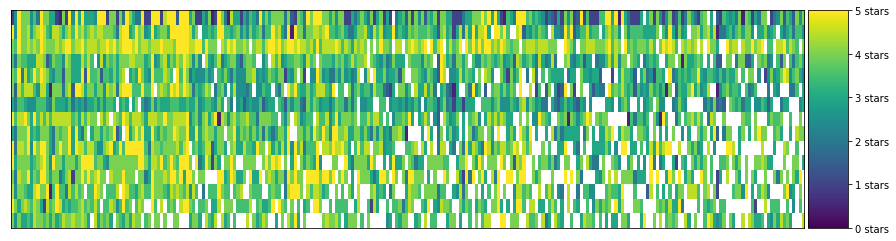

In [29]:
#The following movie recommendation prediction, first select a group and users
cluster_f_number = 7

# View the dataset area with the highest number of values

def sort_by_rating_density(user_movie_ratings, n_movies, n_users):
    most_rated_movies = get_most_rated_movies(user_movie_ratings, n_movies)
    most_rated_movies = get_users_who_rate_the_most(most_rated_movies, n_users)
    return most_rated_movies

def draw_movies_heatmap(most_rated_movies_users_selection, axis_labels=True):
    # Reverse to match the order of the printed dataframe
    # most_rated_movies_users_selection = most_rated_movies_users_selection.iloc[::-1]

    fig = plt.figure(figsize=(15, 4))
    ax = plt.gca()

    # Draw heatmap
    heatmap = ax.imshow(most_rated_movies_users_selection, interpolation='nearest', vmin=0, vmax=5, aspect='auto')

    if axis_labels:
        ax.set_yticks(np.arange(most_rated_movies_users_selection.shape[0]), minor=False)
        ax.set_xticks(np.arange(most_rated_movies_users_selection.shape[1]), minor=False)
        ax.invert_yaxis()
        ax.xaxis.tick_top()
        labels = most_rated_movies_users_selection.columns.str[:40]
        ax.set_xticklabels(labels, minor=False)
        ax.set_yticklabels(most_rated_movies_users_selection.index, minor=False)
        plt.setp(ax.get_xticklabels(), rotation=90)
    else:
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    ax.grid(False)
    ax.set_ylabel('User id')

    # Separate heatmap from color bar
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)

    # Color bar
    cbar = fig.colorbar(heatmap, ticks=[5, 4, 3, 2, 1, 0], cax=cax)
    cbar.ax.set_yticklabels(['5 stars', '4 stars', '3 stars', '2 stars', '1 stars', '0 stars'])

    plt.show()
    
    
n_users = 50
n_movies = 250
cluster_f = clustered_f[clustered_f.group == cluster_f_number].drop(['index', 'group'], axis=1)

cluster_f = sort_by_rating_density(cluster_f, n_movies, n_users)
draw_movies_heatmap(cluster_f, axis_labels=False)

In [30]:
#View the actual rating table
cluster_f.fillna('').head()

,Forrest Gump (1994),Star Wars: Episode I - The Phantom Menace (1999),"Lord of the Rings: The Two Towers, The (2002)",Groundhog Day (1993),Good Will Hunting (1997),Die Hard (1988),Pretty Woman (1990),Pirates of the Caribbean: The Curse of the Black Pearl (2003),"Truman Show, The (1998)","Lord of the Rings: The Fellowship of the Ring, The (2001)",...,Desperado (1995),Basic Instinct (1992),"Mask of Zorro, The (1998)",Big Fish (2003),Pleasantville (1998),Batman Returns (1992),"Matrix Revolutions, The (2003)",Chasing Amy (1997),"Good Morning, Vietnam (1987)",Galaxy Quest (1999)
0,1.0,2.5,5.0,4.0,4.0,4.0,2.5,3.5,2.0,5.0,...,2,2.5,4,1.5,3.5,3,1.5,4,2.5,4
2,5.0,2.5,5.0,4.0,4.0,4.5,3.0,4.0,4.5,5.0,...,3.5,,3,2,3,3.5,2,3.5,3.5,2.5
14,4.0,3.5,5.0,4.0,4.0,4.5,4.0,4.5,4.0,5.0,...,,4.5,4.5,5,3.5,4.5,4,3.5,,4
10,3.5,2.0,4.0,3.5,3.5,3.0,3.0,3.0,4.5,4.5,...,,3.5,1.5,4,,3.5,2,3.5,4,3
3,4.0,3.5,5.0,2.0,4.5,3.0,3.5,5.0,4.0,5.0,...,2.5,3,4,5,4.5,2.5,3.5,4,3,2


In [31]:
#Choose a movie with a blank value as an example, choose movie: Casablanca (1942)
movie_name = "Casablanca (1942)"

cluster_f[movie_name].mean()

4.409090909090909

In [32]:
#Obviously, group 7 has a high score for this movie, so it can recommend this movie to other users who have not seen it
#At the same time, you can view all the average scores and sort them. You can start from the highest to recommend them to users who haven't seen them
qwqwq = cluster_f.mean()
qwqwq.sort_values(ascending = False)


Godfather, The (1972)                    4.785714
Pulp Fiction (1994)                      4.714286
Memento (2000)                           4.653846
Godfather: Part II, The (1974)           4.625000
Fight Club (1999)                        4.464286
                                           ...   
Twister (1996)                           2.409091
You've Got Mail (1998)                   2.363636
Batman Forever (1995)                    2.166667
Ace Ventura: When Nature Calls (1995)    2.125000
Batman & Robin (1997)                    1.545455
Length: 250, dtype: float64